### Step 1: Environment check + lightweight data preview

In [1]:
import os, sys, platform
import pandas as pd
from IPython.display import display

In [2]:
# 1) Print basic environment info (helps debugging)
print("Python:", sys.version.split()[0])
print("pandas:", pd.__version__)
print("OS:", platform.system(), platform.release())

Python: 3.12.12
pandas: 2.2.2
OS: Linux 6.6.105+


In [3]:
# 2) Set your file path here
FILE = r"./AA_FLIGHT_RECORD_FINAL_HUBS.csv"

# 3) Basic file checks
assert os.path.exists(FILE), f"File not found: {FILE}"
size_mb = os.path.getsize(FILE) / (1024 * 1024)
print(f"\nFile: {FILE}")
print(f"Size: {size_mb:.2f} MB")

AssertionError: File not found: ./AA_FLIGHT_RECORD_FINAL_HUBS.csv

In [ ]:
# 4) Try reading first 5 rows
sample = pd.read_csv(FILE, nrows=5, low_memory=False)
print("\n=== HEAD (first 5 rows) ===")
display(sample)


=== HEAD (first 5 rows) ===


,FL_DATE,MKT_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,WHEELS_OFF,CRS_ARR_TIME,ARR_TIME,WHEELS_ON,CANCELLED,DIVERTED,YEAR,MONTH,AIRCRAFT_TYPE,DESCRIPTION
0,2023-01-01,AA,1,JFK,LAX,730,726,743,1052,1054,1042,0.0,0.0,2023,1,699,Airbus Industrie A321/Lr
1,2023-01-02,AA,1,JFK,LAX,730,723,742,1052,1037,1031,0.0,0.0,2023,1,699,Airbus Industrie A321/Lr
2,2023-01-03,AA,1,JFK,LAX,730,807,829,1052,1140,1128,0.0,0.0,2023,1,699,Airbus Industrie A321/Lr
3,2023-01-04,AA,1,JFK,LAX,730,727,747,1052,1039,1024,0.0,0.0,2023,1,699,Airbus Industrie A321/Lr
4,2023-01-05,AA,1,JFK,LAX,730,725,746,1052,1046,1032,0.0,0.0,2023,1,699,Airbus Industrie A321/Lr


In [ ]:
# 5) List all column names
cols = sample.columns.tolist()
print(f"\n=== COLUMN NAMES (total {len(cols)}) ===")
for i, c in enumerate(cols, 1):
    print(f"{i:>2}. {c}")


=== COLUMN NAMES (total 17) ===
 1. FL_DATE
 2. MKT_UNIQUE_CARRIER
 3. OP_CARRIER_FL_NUM
 4. ORIGIN
 5. DEST
 6. CRS_DEP_TIME
 7. DEP_TIME
 8. WHEELS_OFF
 9. CRS_ARR_TIME
10. ARR_TIME
11. WHEELS_ON
12. CANCELLED
13. DIVERTED
14. YEAR
15. MONTH
16. AIRCRAFT_TYPE
17. DESCRIPTION


In [ ]:
# 6) Roughly highlight delay/dep/arr/gate related columns
keywords = ("delay", "dep", "arr", "gate")
cand = [c for c in cols if any(k in c.lower() for k in keywords)]
print("\n=== CANDIDATE COLUMNS (delay/dep/arr/gate related) ===")
for c in cand:
    print("-", c)


=== CANDIDATE COLUMNS (delay/dep/arr/gate related) ===
- MKT_UNIQUE_CARRIER
- OP_CARRIER_FL_NUM
- CRS_DEP_TIME
- DEP_TIME
- CRS_ARR_TIME
- ARR_TIME


### Step 2: Full load safely + quick schema profiling

In [ ]:
# 2) Choose dtypes to save memory and keep NAs (use pandas' nullable integers)
dtype_map = {
    "MKT_UNIQUE_CARRIER": "category",
    "OP_CARRIER_FL_NUM": "Int32",
    "ORIGIN": "category",
    "DEST": "category",
    "CRS_DEP_TIME": "Int32",
    "DEP_TIME": "Int32",
    "WHEELS_OFF": "Int32",
    "CRS_ARR_TIME": "Int32",
    "ARR_TIME": "Int32",
    "WHEELS_ON": "Int32",
    "CANCELLED": "Int8",
    "DIVERTED": "Int8",
    "YEAR": "Int16",
    "MONTH": "Int8",
    "AIRCRAFT_TYPE": "Int32",
    "DESCRIPTION": "category",
}

In [ ]:
# 3) Parse date column
parse_dates = ["FL_DATE"]

# 4) Read the full dataset
df = pd.read_csv(
    FILE,
    dtype=dtype_map,
    parse_dates=parse_dates,
    low_memory=False
)

In [ ]:
# 5) Basic facts
print("=== SHAPE ===")
print(df.shape)

print("\n=== DTYPES ===")
print(df.dtypes)

print("\n=== MISSING VALUES PER COLUMN ===")
print(df.isna().sum().sort_values(ascending=False))

=== SHAPE ===
(406619, 17)

=== DTYPES ===
FL_DATE               datetime64[ns]
MKT_UNIQUE_CARRIER          category
OP_CARRIER_FL_NUM              Int32
ORIGIN                      category
DEST                        category
CRS_DEP_TIME                   Int32
DEP_TIME                       Int32
WHEELS_OFF                     Int32
CRS_ARR_TIME                   Int32
ARR_TIME                       Int32
WHEELS_ON                      Int32
CANCELLED                       Int8
DIVERTED                        Int8
YEAR                           Int16
MONTH                           Int8
AIRCRAFT_TYPE                  Int32
DESCRIPTION                 category
dtype: object

=== MISSING VALUES PER COLUMN ===
WHEELS_ON             5025
ARR_TIME              5025
WHEELS_OFF            4941
DEP_TIME              4653
FL_DATE                  0
AIRCRAFT_TYPE            0
MONTH                    0
YEAR                     0
DIVERTED                 0
CANCELLED                0
CRS_ARR_T

In [ ]:
# 6) Memory footprint
mem_mb = df.memory_usage(deep=True).sum() / (1024**2)
print(f"\n=== TOTAL MEMORY USAGE: {mem_mb:.2f} MB ===")

# 7) Quick peek
from IPython.display import display
print("\n=== HEAD (3 rows) ===")
display(df.head(3))


=== TOTAL MEMORY USAGE: 23.66 MB ===

=== HEAD (3 rows) ===


,FL_DATE,MKT_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,WHEELS_OFF,CRS_ARR_TIME,ARR_TIME,WHEELS_ON,CANCELLED,DIVERTED,YEAR,MONTH,AIRCRAFT_TYPE,DESCRIPTION
0,2023-01-01,AA,1,JFK,LAX,730,726,743,1052,1054,1042,0,0,2023,1,699,Airbus Industrie A321/Lr
1,2023-01-02,AA,1,JFK,LAX,730,723,742,1052,1037,1031,0,0,2023,1,699,Airbus Industrie A321/Lr
2,2023-01-03,AA,1,JFK,LAX,730,807,829,1052,1140,1128,0,0,2023,1,699,Airbus Industrie A321/Lr


### Step 3: Normalize HHMM times to minutes & compute gate delays

In [ ]:
# 1) Helper: convert HHMM -> minutes since midnight (0..1439), keep NA
def hhmm_to_min(x):
    if pd.isna(x):
        return pd.NA
    v = int(x)
    h, m = divmod(v, 100)
    # basic sanity checks
    if h < 0 or h > 23 or m < 0 or m > 59:
        return pd.NA
    return h * 60 + m

In [ ]:
# 2) Apply to relevant columns
time_cols = ["CRS_DEP_TIME", "DEP_TIME", "WHEELS_OFF", "CRS_ARR_TIME", "ARR_TIME", "WHEELS_ON"]
for c in time_cols:
    df[c + "_MIN"] = df[c].apply(hhmm_to_min).astype("Int16")

In [ ]:
# 3) Helper: unwrap cross-midnight differences to [-720, 720]
def unwrap_delay_minutes(diff):
    """Bring a signed difference (actual - sched) in minutes back to [-720, 720] range."""
    if pd.isna(diff):
        return pd.NA
    d = int(diff)
    if d <= -720:  # very negative -> probably next-day actual
        d += 1440
    elif d >= 720: # very positive -> probably prev-day actual (rare but safe)
        d -= 1440
    return d

In [ ]:
# 4) Compute gate departure delay & gate arrival delay (in minutes)
df["DEP_GATE_DELAY_MIN"] = (df["DEP_TIME_MIN"] - df["CRS_DEP_TIME_MIN"]).apply(unwrap_delay_minutes).astype("Int16")
df["ARR_GATE_DELAY_MIN"] = (df["ARR_TIME_MIN"] - df["CRS_ARR_TIME_MIN"]).apply(unwrap_delay_minutes).astype("Int16")

In [ ]:
# 5) Define modeling target: difference between arrival and departure gate delays
df["DELAY_DIFF_MIN"] = (df["ARR_GATE_DELAY_MIN"].astype("Int16") - df["DEP_GATE_DELAY_MIN"].astype("Int16")).astype("Int16")

In [ ]:
# 6) Keep a clean subset for delay analysis (exclude canceled/diverted and rows with missing times)
mask_valid = (
    (df["CANCELLED"] == 0) &
    (df["DIVERTED"] == 0) &
    df[["CRS_DEP_TIME_MIN","DEP_TIME_MIN","CRS_ARR_TIME_MIN","ARR_TIME_MIN"]].notna().all(axis=1)
)
delay_df = df.loc[mask_valid, ["FL_DATE","ORIGIN","DEST","MKT_UNIQUE_CARRIER",
                               "OP_CARRIER_FL_NUM","AIRCRAFT_TYPE","DESCRIPTION",
                               "DEP_GATE_DELAY_MIN","ARR_GATE_DELAY_MIN","DELAY_DIFF_MIN"]].copy()

In [ ]:
# 7) Quick sanity checks
print("=== delay_df SHAPE ===")
print(delay_df.shape)

print("\n=== delay_df HEAD ===")
display(delay_df.head())

print("\n=== delay summary (minutes) ===")
print(delay_df[["DEP_GATE_DELAY_MIN","ARR_GATE_DELAY_MIN","DELAY_DIFF_MIN"]].describe())

=== delay_df SHAPE ===
(399988, 10)

=== delay_df HEAD ===


,FL_DATE,ORIGIN,DEST,MKT_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,AIRCRAFT_TYPE,DESCRIPTION,DEP_GATE_DELAY_MIN,ARR_GATE_DELAY_MIN,DELAY_DIFF_MIN
0,2023-01-01,JFK,LAX,AA,1,699,Airbus Industrie A321/Lr,-4,2,6
1,2023-01-02,JFK,LAX,AA,1,699,Airbus Industrie A321/Lr,-7,-15,-8
2,2023-01-03,JFK,LAX,AA,1,699,Airbus Industrie A321/Lr,37,48,11
3,2023-01-04,JFK,LAX,AA,1,699,Airbus Industrie A321/Lr,-3,-13,-10
4,2023-01-05,JFK,LAX,AA,1,699,Airbus Industrie A321/Lr,-5,-6,-1



=== delay summary (minutes) ===
       DEP_GATE_DELAY_MIN  ARR_GATE_DELAY_MIN  DELAY_DIFF_MIN
count            399988.0            399988.0        399988.0
mean            14.145517            7.218309       -6.927208
std             56.599407           59.575482       22.215289
min                -719.0              -720.0         -1433.0
25%                  -4.0               -17.0           -17.0
50%                  -1.0                -6.0            -9.0
75%                  11.0                12.0             0.0
max                 720.0               720.0          1436.0


### Step 4: Outlier diagnostics & cleaning

In [ ]:
# 1) Inspect extreme quantiles to see tails
qs = delay_df[["DEP_GATE_DELAY_MIN","ARR_GATE_DELAY_MIN","DELAY_DIFF_MIN"]].quantile([0.001,0.01,0.05,0.95,0.99,0.999])
print("=== Extreme quantiles (0.1%/1%/5%/95%/99%/99.9%) ===")
print(qs)

=== Extreme quantiles (0.1%/1%/5%/95%/99%/99.9%) ===
       DEP_GATE_DELAY_MIN  ARR_GATE_DELAY_MIN  DELAY_DIFF_MIN
0.001            -535.013            -523.013           -53.0
0.010               -11.0               -43.0           -39.0
0.050                -8.0               -31.0           -29.0
0.950                94.0                94.0            20.0
0.990               240.0               241.0            48.0
0.999               601.0               601.0           109.0


In [ ]:
# 2) Count how many values fall outside proposed guardrails
def outside_count(s, lo, hi):
    return int(((s < lo) | (s > hi)).sum())

dep_out = outside_count(delay_df["DEP_GATE_DELAY_MIN"], -360, 360)
arr_out = outside_count(delay_df["ARR_GATE_DELAY_MIN"], -360, 360)
diff_out = outside_count(delay_df["DELAY_DIFF_MIN"], -240, 240)

print("\n=== Out-of-range counts ===")
print(f"DEP_GATE_DELAY_MIN outside [-360, 360]: {dep_out}")
print(f"ARR_GATE_DELAY_MIN outside [-360, 360]: {arr_out}")
print(f"DELAY_DIFF_MIN outside [-240, 240]: {diff_out}")


=== Out-of-range counts ===
DEP_GATE_DELAY_MIN outside [-360, 360]: 2356
ARR_GATE_DELAY_MIN outside [-360, 360]: 2340
DELAY_DIFF_MIN outside [-240, 240]: 45


In [ ]:
# 3) Peek at worst cases for delay_diff (likely cross-midnight arithmetic artifacts)
print("\n=== Few smallest/biggest delay_diff records ===")
display(delay_df.sort_values("DELAY_DIFF_MIN").head(5))
display(delay_df.sort_values("DELAY_DIFF_MIN", ascending=False).head(5))


=== Few smallest/biggest delay_diff records ===


,FL_DATE,ORIGIN,DEST,MKT_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,AIRCRAFT_TYPE,DESCRIPTION,DEP_GATE_DELAY_MIN,ARR_GATE_DELAY_MIN,DELAY_DIFF_MIN
130741,2023-08-13,ORD,MIA,AA,1277,887,B787-800 Dreamliner,716,-717,-1433
244456,2024-03-01,LAX,PHL,AA,1990,637,Boeing 777-300/300ER/333ER,718,-710,-1428
256419,2024-04-15,PHL,MIA,AA,832,694,Airbus Industrie A320-100/200,707,-720,-1427
291695,2024-06-17,PHL,ORD,AA,1652,721,Airbus Industrie A321-200n,702,-720,-1422
358314,2024-10-29,LAX,JFK,AA,2,627,Boeing 777-200ER/200LR/233LR,696,-712,-1408


,FL_DATE,ORIGIN,DEST,MKT_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,AIRCRAFT_TYPE,DESCRIPTION,DEP_GATE_DELAY_MIN,ARR_GATE_DELAY_MIN,DELAY_DIFF_MIN
57920,2023-04-21,ORD,PHL,AA,2777,887,B787-800 Dreamliner,-719,717,1436
252397,2024-04-12,LAX,ORD,AA,1565,887,B787-800 Dreamliner,-714,715,1429
343784,2024-09-15,ORD,PHX,AA,866,698,Airbus Industrie A319,-711,716,1427
98457,2023-07-09,DFW,DCA,AA,262,721,Airbus Industrie A321-200n,-715,711,1426
393926,2024-12-21,ORD,CLT,AA,1784,721,Airbus Industrie A321-200n,-709,716,1425


In [ ]:
# 4) Apply guardrails to create a clean dataset
mask_plausible = (
    delay_df["DEP_GATE_DELAY_MIN"].between(-360, 360) &
    delay_df["ARR_GATE_DELAY_MIN"].between(-360, 360) &
    delay_df["DELAY_DIFF_MIN"].between(-240, 240)
)
clean_df = delay_df.loc[mask_plausible].copy()

print("\n=== clean_df SHAPE ===")
print(clean_df.shape)

print("\n=== clean_df delay summary (minutes) ===")
print(clean_df[["DEP_GATE_DELAY_MIN","ARR_GATE_DELAY_MIN","DELAY_DIFF_MIN"]].describe())


=== clean_df SHAPE ===
(397542, 10)

=== clean_df delay summary (minutes) ===
       DEP_GATE_DELAY_MIN  ARR_GATE_DELAY_MIN  DELAY_DIFF_MIN
count            397542.0            397542.0        397542.0
mean            12.774122             5.74046       -7.033662
std             39.321202           43.358312        16.47539
min                -353.0              -359.0           -91.0
25%                  -4.0               -17.0           -17.0
50%                  -1.0                -6.0            -9.0
75%                  10.0                12.0             0.0
max                 360.0               360.0           232.0


### Step 5: Core visuals

####  A) Distributions (histograms)

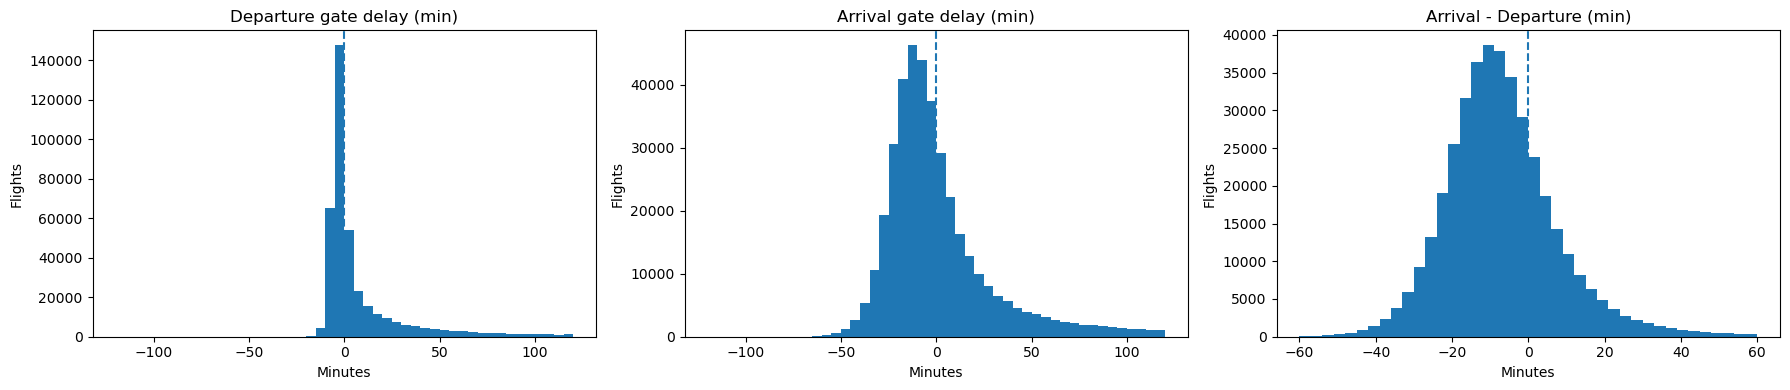

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ------------- A) Distributions (histograms) -------------
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
cols = ["DEP_GATE_DELAY_MIN", "ARR_GATE_DELAY_MIN", "DELAY_DIFF_MIN"]
titles = ["Departure gate delay (min)", "Arrival gate delay (min)", "Arrival - Departure (min)"]

for ax, col, title in zip(axes, cols, titles):
    data = clean_df[col].dropna().to_numpy()
    # choose bins for readable shape
    if col != "DELAY_DIFF_MIN":
        bins = np.arange(-120, 121, 5)   # +/- 2 hours focus (tails trimmed by cleaning anyway)
    else:
        bins = np.arange(-60, 61, 3)     # +/- 1 hour focus for difference
    ax.hist(data, bins=bins)
    ax.axvline(0, linestyle="--")
    ax.set_title(title)
    ax.set_xlabel("Minutes")
    ax.set_ylabel("Flights")

plt.tight_layout()
plt.show()

C:\Users\ROG\AppData\Local\Temp\ipykernel_21172\1959065299.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("ORIGIN")
C:\Users\ROG\AppData\Local\Temp\ipykernel_21172\1959065299.py:7: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query("n >= 2000")   # keep airports with >=2000 flights


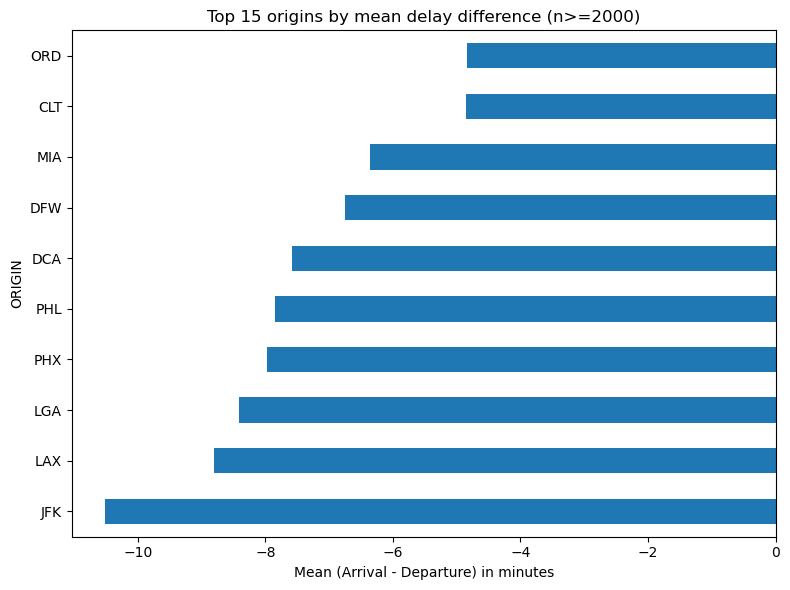

In [ ]:
# ------------- B) Airport-level differences (Top 15 by mean difference) -------------
# require enough samples per origin to avoid noise
agg_airport = (clean_df
               .groupby("ORIGIN")
               .agg(n=("DELAY_DIFF_MIN", "size"),
                    mean_diff=("DELAY_DIFF_MIN", "mean"))
               .query("n >= 2000")   # keep airports with >=2000 flights
               .sort_values("mean_diff", ascending=False)
               .head(15))

fig, ax = plt.subplots(figsize=(8, 6))
agg_airport.sort_values("mean_diff").plot(kind="barh", y="mean_diff", ax=ax, legend=False)
ax.set_xlabel("Mean (Arrival - Departure) in minutes")
ax.set_title("Top 15 origins by mean delay difference (n>=2000)")
plt.tight_layout()
plt.show()

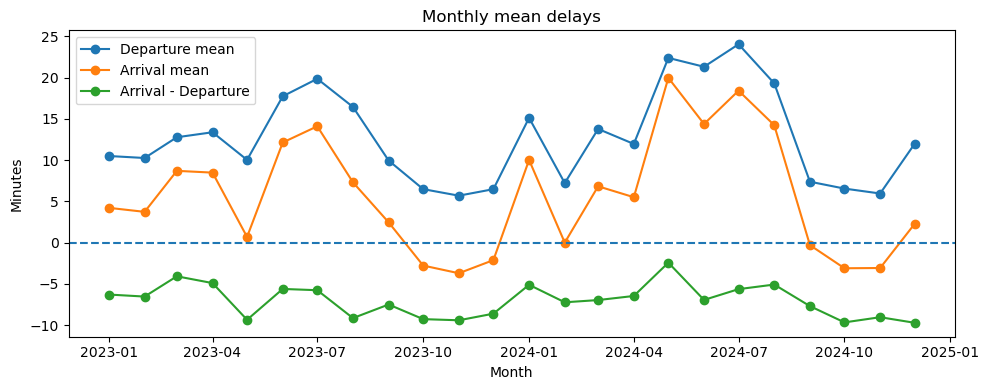

In [ ]:
# ------------- C) Monthly trend -------------
# --- Fix for monthly plot: add YEAR/MONTH from FL_DATE, then group ---
import pandas as pd
import matplotlib.pyplot as plt

# 1) Add YEAR and MONTH derived from FL_DATE
clean_df = clean_df.copy()
clean_df["YEAR"] = clean_df["FL_DATE"].dt.year.astype("Int16")
clean_df["MONTH"] = clean_df["FL_DATE"].dt.month.astype("Int8")

# 2) Aggregate monthly means
monthly = (clean_df
           .groupby(["YEAR", "MONTH"])
           .agg(dep_mean=("DEP_GATE_DELAY_MIN", "mean"),
                arr_mean=("ARR_GATE_DELAY_MIN", "mean"),
                diff_mean=("DELAY_DIFF_MIN", "mean"))
           .reset_index())

# 3) Build a proper monthly datetime for plotting (first day of month)
monthly["date"] = pd.to_datetime(monthly["YEAR"].astype(str) + "-" +
                                 monthly["MONTH"].astype(str) + "-01")

# 4) Plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(monthly["date"], monthly["dep_mean"], marker="o", label="Departure mean")
ax.plot(monthly["date"], monthly["arr_mean"], marker="o", label="Arrival mean")
ax.plot(monthly["date"], monthly["diff_mean"], marker="o", label="Arrival - Departure")
ax.axhline(0, linestyle="--")
ax.set_title("Monthly mean delays")
ax.set_xlabel("Month")
ax.set_ylabel("Minutes")
ax.legend()
plt.tight_layout()
plt.show()
